In [ ]:
Интеллектуальный анализ данных – весна 2023
Домашнее задание 4: kNN. Линейные модели. Работа с признаками
Правила:

Домашнее задание оценивается в 10 баллов.

Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

Можно использовать любые свободные источники с обязательным указанием ссылки на них.

Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.

In [ ]:
Задание 1: Визуализация решающих поверхностей в kNN.
В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в sklearn набором данных wine, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти здесь и здесь.

Загрузим набор данных и сохраним информацию о признаках в переменную X, а о зависимой переменной – в переменную y.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


In [ ]:
Задача 1.1 (0.5 балла) Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [36]:
X.isnull().sum().sum()

0

In [ ]:
Нулевых значений нет, удалять нечего. Проверим на наличие категориальных данных:

In [38]:
cat_features_mask = (X.dtypes == "object").values
cat_features_mask.sum()

0

In [6]:
Категориальных данных нет

SyntaxError: invalid syntax (242185012.py, line 1)

In [ ]:
Задача 1.2 (0.5 балла) Используя функцию train_test_split(), разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать np.random.seed() для воспроизводимости результатов.

In [39]:
from sklearn.model_selection import train_test_split
np.random.seed(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [ ]:
Задача 1.3 (1 балл) На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр n_neighbours класса KNeighborsClassifier). Для обучения используйте только два признака: alcohol и magnesium – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля StandardScaler.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
kNN_list = [] # Для 1.5
from sklearn import preprocessing
X_train = X_train.filter(['alcohol','magnesium']) # Выделили нужные нам два признака
X_test = X_test.filter(['alcohol','magnesium'])
normalizer = preprocessing.StandardScaler()
normalizer.fit(X_train) # Запоминаем обучающую и трансформируем тестовую с обучающей, но не запоминаем тестовую
X_train_transformed = normalizer.transform(X_train)
X_test_transformed = normalizer.transform(X_test)
k_neighbors = [1, 3, 5, 10, 15, 25]
for k in k_neighbors:
    y_predicted_test = (
        KNeighborsClassifier(n_neighbors=k, p = 2).fit(X_train_transformed, y_train).predict(X_test_transformed)
    )
    y_predicted_train = (
        KNeighborsClassifier(n_neighbors=k, p = 2).fit(X_train_transformed, y_train).predict(X_train_transformed)
    )
    kNN_list.append(KNeighborsClassifier(n_neighbors=k, p = 2).fit(X_train_transformed, y_train))
    val_accuracy_test = np.mean(y_predicted_test == y_test)
    val_accuracy_train = np.mean(y_predicted_train == y_train)
    print(f"k = {k}; accuracy on train = {val_accuracy_train:.2f}")
    print(f"k = {k}; accuracy on test = {val_accuracy_test:.2f}")

k = 1; accuracy on train = 1.00
k = 1; accuracy on test = 0.67
k = 3; accuracy on train = 0.81
k = 3; accuracy on test = 0.78
k = 5; accuracy on train = 0.75
k = 5; accuracy on test = 0.72
k = 10; accuracy on train = 0.73
k = 10; accuracy on test = 0.78
k = 15; accuracy on train = 0.73
k = 15; accuracy on test = 0.80
k = 25; accuracy on train = 0.67
k = 25; accuracy on test = 0.80


In [ ]:
Задача 1.4 (0 баллов) Установите библиотеку mlxtend командой ниже. Библиотеку также можно установить из терминала при помощи pip или conda, как указано здесь.

In [10]:
!pip install mlxtend

In [ ]:
Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [41]:
import mlxtend

In [ ]:
Задача 1.5 (1 балл) Библиотека mlxtend позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите документацию библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

Подсказки:

Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
Обратите внимание на то, как нужно изменить параметры gridspec.GridSpec() и itertools.product() для нашего числа классификаторов.
В функции plot_decision_region() используйте y_train и нужные столбцы из X_train. Возможно, их придётся перевести в формат массива numpy.
Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
Построение графика может занять некоторое время – придётся немного подождать!

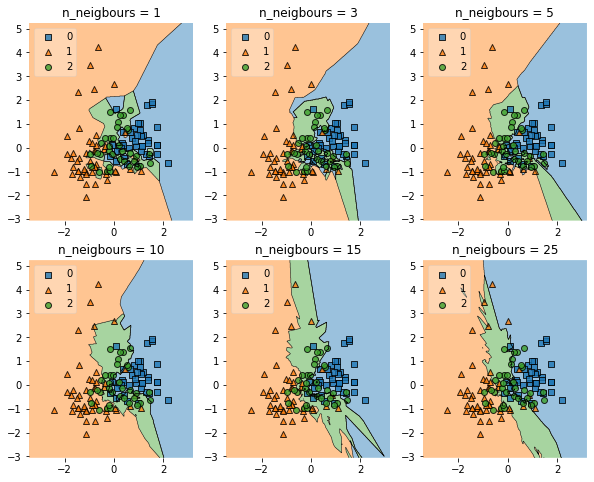

In [42]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(10,8))

labels = ['n_neigbours = 1', 'n_neigbours = 3', 'n_neigbours = 5', 'n_neigbours = 10', 'n_neigbours = 15', 'n_neigbours = 25']
for clf, lab, grd in zip(kNN_list,
                         labels,
                         itertools.product([0, 1], [0, 1, 2])):

    clf.fit(X_train_transformed, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_transformed, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [ ]:
Задача 1.6 (0.5 балла) Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

In [ ]:
В задаче 1.3 мы видим, что с ростом числа соседей качество модели на обучающей выборке падает, а на тестовой в целом растет. В соответствии с результатами, полученными в задаче 1.3, оптимально брать количество соседей, равное 15,25, потому что доля верных ответов на тесте наибольшая при этих значениях гиперпараметров.
Задача 1.5 подтверждает наши рассуждения, на сетке графиков решающих поверхностей видно, что при небольших k решающие поверхности достаточно разрежены, с увеличением гиперпараметра они сглаживаются и при k = 10, 15 видно, что решающие поверхности наиболее точно отражают распределение по классам.
По обоим выводам заключаем, что оптимальное число соседей - это 15

In [ ]:
Задание 2. KNN своими руками. 2 Балла
В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

In [153]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        differences = ((X_train - X[np.newaxis, :])**2).sum(-1)   # Посчитаем квадрат расстояния между точками обучающей и тестовой выборки
        y_train1 = y_train[None] # Сделаем из тренировочной выборки одномерный массив
        df_differences_y = np.row_stack((differences, y_train1)).T   # Соединим массив расстояний и классы, к которым относятся иксы из тренировочной выборки, транспонируем полученный дф
        df_differences_y = df_differences_y[df_differences_y[:, 0].argsort()] # Отсортируем дф по первому столбику - массиву расстояний
        result = Counter(df_differences_y[:k,1]).most_common(k)[0][0]
        return np.array(result) # Вернем массив(наиболее часто встречающееся среди (матрицы расстояний между тестом и тренировкой) и нужным числом соседей)

In [154]:
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]



In [152]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

AssertionError: 